<a href="https://colab.research.google.com/github/GabrielCostaDeOliveira/faceDetectionTraining/blob/main/faceDetectionDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

from fastai.vision.all import *
import numpy as np

In [2]:
path = Path(os.path.join(os.getcwd(), '..', 'dataset'))
Path.BASE_PATH = path
path

Path('.')

In [3]:
path.ls()

(#3) [Path('wider_face_split'),Path('WIDER_train'),Path('WIDER_val')]

Verificando se as imagens não foram corrompidas

In [6]:
failed = verify_images(get_image_files(path))
failed

(#0) []

Eliminando as imagens que falharam

In [8]:
failed.map(Path.unlink)

(#0) []

todo

In [4]:
def img2bbox(path):
    return Path(str(path).rsplit('.', 1)[0] + '.txt')

In [50]:
def get_y(path):
    with open(path, 'r', encoding='utf-8') as f:
        return [[*map(int, s.strip().split()[:4])] for s in f.readlines()]

In [101]:
def get_y1(path):
    ctr = np.genfromtxt(path)
    if len(ctr.shape) == 1:
        ctr = np.array([ctr])
    return tensor(ctr[:,:4])

In [102]:
get_y1(r'C:\Users\Thalisson\prog\aulas\ml\faceDetectionTraining\dataset\WIDER_train\annotations\5--Car_Accident\5_Car_Accident_Accident_5_25')

tensor([[567., 207.,  44.,  52.]])

In [103]:
db = DataBlock(
    blocks=(ImageBlock, BBoxBlock),
    get_items=get_image_files,
    get_y=get_y1,
    splitter=FuncSplitter(lambda o: o.parent.parent.parent.name.endswith('val')),
    item_tfms=[Resize(128, method='pad')]
)

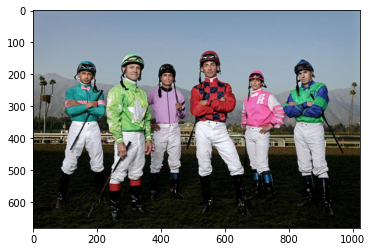

In [104]:
plt.imshow(plt.imread(r'C:\Users\Thalisson\prog\aulas\ml\faceDetectionTraining\dataset\WIDER_train\images\46--Jockey\46_Jockey_Jockey_46_12.jpg'));

In [105]:
dls = db.dataloaders(path)
dls.show_batch(max_n=6, figsize=(8, 6))

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 251: character maps to <undefined>